In [308]:
#HouseKeeping
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize']=(10,9)

In [290]:
#for reading the dataframe into dataframe object
df=pd.read_json(r'./Data Scientist challenge.json')

In [291]:
df.shape

(96, 7)

In [292]:
df.describe()

,accountNo,user_id,booking_id,amount
count,96.0,96.0,96.000000,96.000000
mean,781.0,106.0,48.500000,615.802083
std,0.0,0.0,27.856777,2549.851668
min,781.0,106.0,1.000000,-2600.000000
25%,781.0,106.0,24.750000,-160.000000
50%,781.0,106.0,48.500000,-50.000000
75%,781.0,106.0,72.250000,450.000000
max,781.0,106.0,96.000000,20000.000000


In [51]:
df.dtypes

accountNo              int64
user_id                int64
booking_id             int64
amount                 int64
bookingDate           object
partnerAccountIBAN    object
bookingType           object
dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
accountNo             96 non-null int64
user_id               96 non-null int64
booking_id            96 non-null int64
amount                96 non-null int64
bookingDate           96 non-null object
partnerAccountIBAN    96 non-null object
bookingType           96 non-null object
dtypes: int64(4), object(3)
memory usage: 5.4+ KB


In [293]:
df.head()

,accountNo,user_id,booking_id,amount,bookingDate,partnerAccountIBAN,bookingType
0,781,106,1,-50,2015-07-15 02:00:03,None,ATM
1,781,106,2,-1000,2015-07-29 02:00:03,DE513,Rent
2,781,106,3,3566,2015-07-29 02:00:03,DE512,Salary
3,781,106,4,-160,2015-07-29 02:00:03,DE38900,Installment
4,781,106,5,450,2015-07-29 02:00:03,DE40042,Unknown


In [310]:
df['Date']=pd.to_datetime(df['bookingDate'],format='%Y-%m')
df['Month']=df['Date'].apply(lambda l:l.strftime('%Y-%m'))

In [316]:
df_changed_index = df.copy()
df_changed_index.set_index(['Month'],inplace=True)

In [311]:
df.head(20)

,accountNo,user_id,booking_id,amount,bookingDate,partnerAccountIBAN,bookingType,Date,Month
0,781,106,1,-50,2015-07-15 02:00:03,None,ATM,2015-07-15 02:00:03,2015-07
1,781,106,2,-1000,2015-07-29 02:00:03,DE513,Rent,2015-07-29 02:00:03,2015-07
2,781,106,3,3566,2015-07-29 02:00:03,DE512,Salary,2015-07-29 02:00:03,2015-07
3,781,106,4,-160,2015-07-29 02:00:03,DE38900,Installment,2015-07-29 02:00:03,2015-07
4,781,106,5,450,2015-07-29 02:00:03,DE40042,Unknown,2015-07-29 02:00:03,2015-07
5,781,106,6,190,2015-07-29 02:00:03,DE400423333,Childbenefit,2015-07-29 02:00:03,2015-07
6,781,106,7,-50,2015-07-29 02:00:03,None,ATM,2015-07-29 02:00:03,2015-07
7,781,106,8,-50,2015-08-15 02:00:04,None,ATM,2015-08-15 02:00:04,2015-08
8,781,106,9,-1000,2015-08-29 02:00:04,DE513,Rent,2015-08-29 02:00:04,2015-08
9,781,106,10,5677,2015-08-29 02:00:04,DE512,Salary,2015-08-29 02:00:04,2015-08


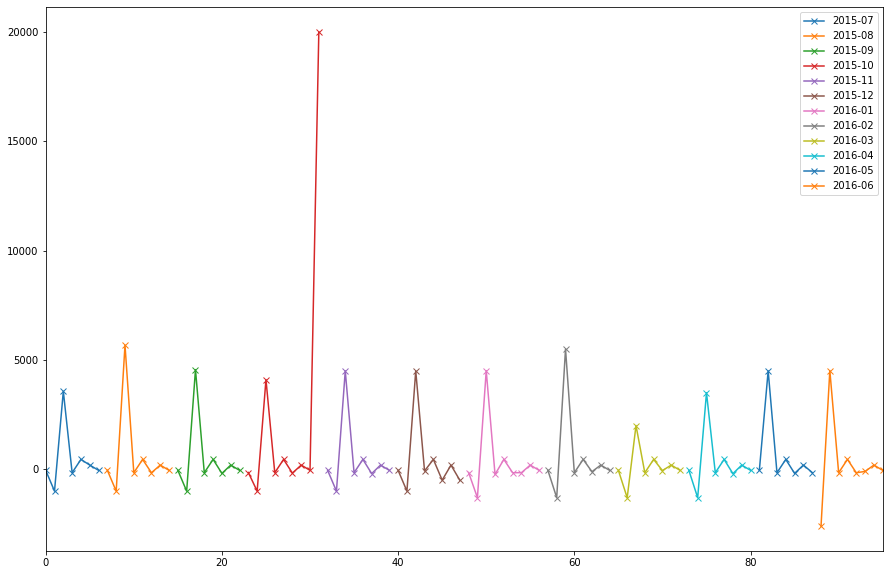

In [312]:
plt.figure(figsize=(15,10))
df.groupby('Month').amount.plot(marker='x')
plt.legend()
#There has been an anomaly in the income pattern, the next step is to investigate and find out what is the issue

Text(0.5, 1.0, 'Graphical Pattern Representing Credit and Debit from account')

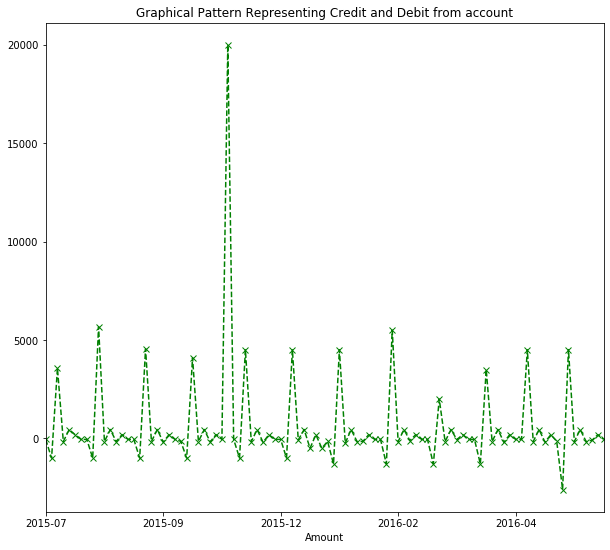

In [340]:
df_changed_index.amount.plot(color='g',marker='x',ls='--')
plt.xlabel("Amount")
plt.title("Graphical Pattern Representing Credit and Debit from account")

In [301]:
print(df[df['amount']>5000])
#Salary seems to have an unknown deposit of 20000. rest major credit has been salary. so trying to look at the salary pattern

    accountNo  user_id  booking_id  amount          bookingDate  \
9         781      106          10    5677  2015-08-29 02:00:04   
31        781      106          32   20000  2015-10-29 02:00:03   
59        781      106          60    5500  2016-02-29 02:00:00   

   partnerAccountIBAN bookingType                Date  
9               DE512      Salary 2015-08-29 02:00:04  
31              DE900     Unknown 2015-10-29 02:00:03  
59              DE512      Salary 2016-02-29 02:00:00  


In [302]:
df[df['bookingType']=='Salary']
#No major upset and the salary has been credited every month
#the extra 20000 has not been a bonus as well , otherwise the partnerAccountIBAN number would have matched

,accountNo,user_id,booking_id,amount,bookingDate,partnerAccountIBAN,bookingType,Date
2,781,106,3,3566,2015-07-29 02:00:03,DE512,Salary,2015-07-29 02:00:03
9,781,106,10,5677,2015-08-29 02:00:04,DE512,Salary,2015-08-29 02:00:04
17,781,106,18,4555,2015-09-29 02:00:05,DE512,Salary,2015-09-29 02:00:05
25,781,106,26,4100,2015-10-29 02:00:00,DE512,Salary,2015-10-29 02:00:00
34,781,106,35,4500,2015-11-29 02:00:01,DE512,Salary,2015-11-29 02:00:01
42,781,106,43,4500,2015-12-29 02:00:02,DE512,Salary,2015-12-29 02:00:02
50,781,106,51,4510,2016-01-29 02:00:03,DE512,Salary,2016-01-29 02:00:03
59,781,106,60,5500,2016-02-29 02:00:00,DE512,Salary,2016-02-29 02:00:00
67,781,106,68,2000,2016-03-29 02:00:00,DE512,Salary,2016-03-29 02:00:00
75,781,106,76,3500,2016-04-29 02:00:00,DE512,Salary,2016-04-29 02:00:00


In [303]:
df[df['bookingType']=='Unknown']
#there are two possibilities, either the money has been deposited(profit money) or it has been mistakenly transferred.

,accountNo,user_id,booking_id,amount,bookingDate,partnerAccountIBAN,bookingType,Date
4,781,106,5,450,2015-07-29 02:00:03,DE40042,Unknown,2015-07-29 02:00:03
11,781,106,12,450,2015-08-29 02:00:04,DE40042,Unknown,2015-08-29 02:00:04
19,781,106,20,450,2015-09-29 02:00:05,DE40042,Unknown,2015-09-29 02:00:05
27,781,106,28,450,2015-10-29 02:00:00,DE40042,Unknown,2015-10-29 02:00:00
31,781,106,32,20000,2015-10-29 02:00:03,DE900,Unknown,2015-10-29 02:00:03
36,781,106,37,450,2015-11-29 02:00:01,DE40042,Unknown,2015-11-29 02:00:01
44,781,106,45,450,2015-12-29 02:00:02,DE40042,Unknown,2015-12-29 02:00:02
52,781,106,53,450,2016-01-29 02:00:03,DE40042,Unknown,2016-01-29 02:00:03
61,781,106,62,450,2016-02-29 02:00:00,DE40042,Unknown,2016-02-29 02:00:00
69,781,106,70,450,2016-03-29 02:00:00,DE40042,Unknown,2016-03-29 02:00:00


In [307]:
#Similarly there seems to be a different trend for expenses 
df[df['amount']<-1000]
#rent has been missed for a month and thus the small anomaly is nothing but a double payment of the rent


,accountNo,user_id,booking_id,amount,bookingDate,partnerAccountIBAN,bookingType,Date
49,781,106,50,-1300,2016-01-29 02:00:03,DE511,Rent,2016-01-29 02:00:03
58,781,106,59,-1300,2016-02-29 02:00:00,DE511,Rent,2016-02-29 02:00:00
66,781,106,67,-1300,2016-03-29 02:00:00,DE511,Rent,2016-03-29 02:00:00
74,781,106,75,-1300,2016-04-29 02:00:00,DE511,Rent,2016-04-29 02:00:00
88,781,106,89,-2600,2016-06-27 02:00:00,DE511,Rent,2016-06-27 02:00:00


In [102]:
from datetime import datetime

In [150]:
df.head(15)

,accountNo,user_id,booking_id,amount,partnerAccountIBAN,bookingType,Date,Month
0,781,106,1,-50,None,ATM,2015-07-15 02:00:03,2015-07
1,781,106,2,-1000,DE513,Rent,2015-07-29 02:00:03,2015-07
2,781,106,3,3566,DE512,Salary,2015-07-29 02:00:03,2015-07
3,781,106,4,-160,DE38900,Installment,2015-07-29 02:00:03,2015-07
4,781,106,5,450,DE40042,Unknown,2015-07-29 02:00:03,2015-07
5,781,106,6,190,DE400423333,Childbenefit,2015-07-29 02:00:03,2015-07
6,781,106,7,-50,None,ATM,2015-07-29 02:00:03,2015-07
7,781,106,8,-50,None,ATM,2015-08-15 02:00:04,2015-08
8,781,106,9,-1000,DE513,Rent,2015-08-29 02:00:04,2015-08
9,781,106,10,5677,DE512,Salary,2015-08-29 02:00:04,2015-08


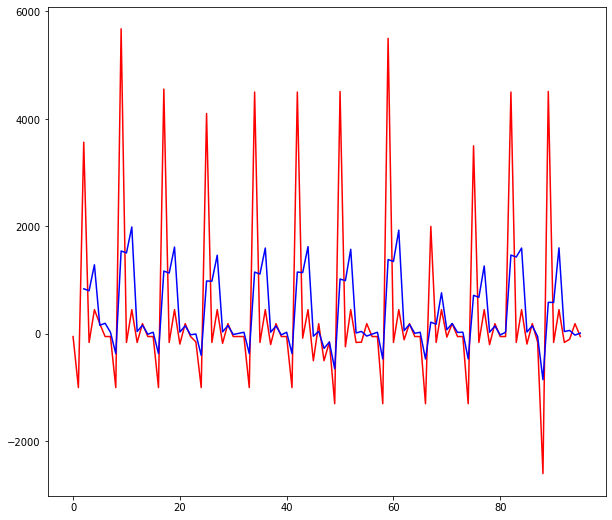

In [171]:
plt.figure(figsize=(10,9))
plt.plot(df['amount'],'r')
plt.plot(df['amount'].rolling(3).mean(),'b')




In [123]:
#Rent has increased by 30 % in the next year
df[df['amount']<-800]

,accountNo,user_id,booking_id,amount,partnerAccountIBAN,bookingType,Date,Month
1,781,106,2,-1000,DE513,Rent,2015-07-29 02:00:03,2015-07
8,781,106,9,-1000,DE513,Rent,2015-08-29 02:00:04,2015-08
16,781,106,17,-1000,DE513,Rent,2015-09-29 02:00:05,2015-09
24,781,106,25,-1000,DE513,Rent,2015-10-29 02:00:00,2015-10
33,781,106,34,-1000,DE513,Rent,2015-11-29 02:00:01,2015-11
41,781,106,42,-1000,DE513,Rent,2015-12-29 02:00:02,2015-12
49,781,106,50,-1300,DE511,Rent,2016-01-29 02:00:03,2016-01
58,781,106,59,-1300,DE511,Rent,2016-02-29 02:00:00,2016-02
66,781,106,67,-1300,DE511,Rent,2016-03-29 02:00:00,2016-03
74,781,106,75,-1300,DE511,Rent,2016-04-29 02:00:00,2016-04


In [129]:
df[df['bookingType']=="Installment"]

,accountNo,user_id,booking_id,amount,partnerAccountIBAN,bookingType,Date,Month
3,781,106,4,-160,DE38900,Installment,2015-07-29 02:00:03,2015-07
10,781,106,11,-160,DE38900,Installment,2015-08-29 02:00:04,2015-08
18,781,106,19,-160,DE38900,Installment,2015-09-29 02:00:05,2015-09
26,781,106,27,-160,DE38900,Installment,2015-10-29 02:00:00,2015-10
35,781,106,36,-160,DE38900,Installment,2015-11-29 02:00:01,2015-11
43,781,106,44,-80,DE38900,Installment,2015-12-29 02:00:02,2015-12
51,781,106,52,-240,DE38900,Installment,2016-01-29 02:00:03,2016-01
60,781,106,61,-160,DE38900,Installment,2016-02-29 02:00:00,2016-02
68,781,106,69,-160,DE38900,Installment,2016-03-29 02:00:00,2016-03
76,781,106,77,-160,DE38900,Installment,2016-04-29 02:00:00,2016-04


In [130]:
df[df['bookingType']=="ATM"]

,accountNo,user_id,booking_id,amount,partnerAccountIBAN,bookingType,Date,Month
0,781,106,1,-50,None,ATM,2015-07-15 02:00:03,2015-07
6,781,106,7,-50,None,ATM,2015-07-29 02:00:03,2015-07
7,781,106,8,-50,None,ATM,2015-08-15 02:00:04,2015-08
14,781,106,15,-50,None,ATM,2015-08-29 02:00:04,2015-08
15,781,106,16,-50,None,ATM,2015-09-10 02:00:05,2015-09
22,781,106,23,-50,None,ATM,2015-09-29 02:00:05,2015-09
23,781,106,24,-150,None,ATM,2015-10-04 02:00:00,2015-10
30,781,106,31,-50,None,ATM,2015-10-29 02:00:00,2015-10
32,781,106,33,-50,None,ATM,2015-11-07 02:00:01,2015-11
39,781,106,40,-50,None,ATM,2015-11-29 02:00:01,2015-11


In [131]:
df[df['bookingType']=="Salary"]

,accountNo,user_id,booking_id,amount,partnerAccountIBAN,bookingType,Date,Month
2,781,106,3,3566,DE512,Salary,2015-07-29 02:00:03,2015-07
9,781,106,10,5677,DE512,Salary,2015-08-29 02:00:04,2015-08
17,781,106,18,4555,DE512,Salary,2015-09-29 02:00:05,2015-09
25,781,106,26,4100,DE512,Salary,2015-10-29 02:00:00,2015-10
34,781,106,35,4500,DE512,Salary,2015-11-29 02:00:01,2015-11
42,781,106,43,4500,DE512,Salary,2015-12-29 02:00:02,2015-12
50,781,106,51,4510,DE512,Salary,2016-01-29 02:00:03,2016-01
59,781,106,60,5500,DE512,Salary,2016-02-29 02:00:00,2016-02
67,781,106,68,2000,DE512,Salary,2016-03-29 02:00:00,2016-03
75,781,106,76,3500,DE512,Salary,2016-04-29 02:00:00,2016-04


In [132]:
df_income=df[df['amount']>=0]
df_expense=df[df['amount']<0]

Text(0, 0.5, 'Income')

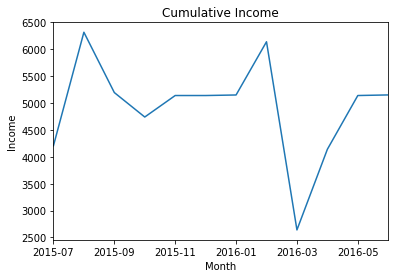

In [145]:
df_income.groupby("Month").sum()['amount'].plot()
plt.title("Cumulative Income")
plt.ylabel("Income")

Text(0, 0.5, 'Expense')

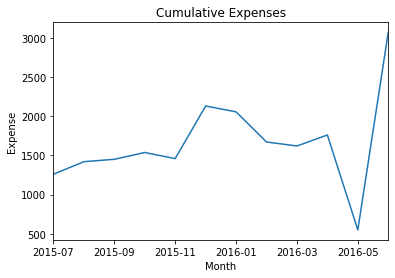

In [260]:
abs(df_expense.groupby("Month").sum()['amount']).plot()
plt.title("Cumulative Expenses")
plt.ylabel("Expense")

In [261]:
df_expense.groupby("Month").sum()['amount']

Month
2015-07   -1260
2015-08   -1420
2015-09   -1450
2015-10   -1537
2015-11   -1459
2015-12   -2130
2016-01   -2055
2016-02   -1671
2016-03   -1620
2016-04   -1760
2016-05    -550
2016-06   -3070
Name: amount, dtype: int64

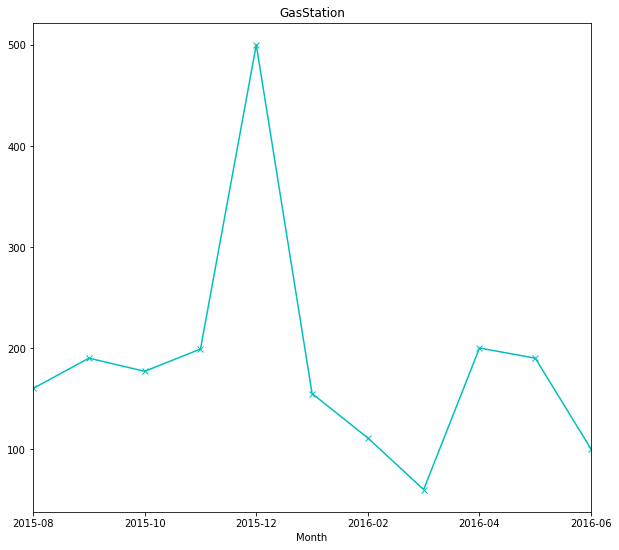

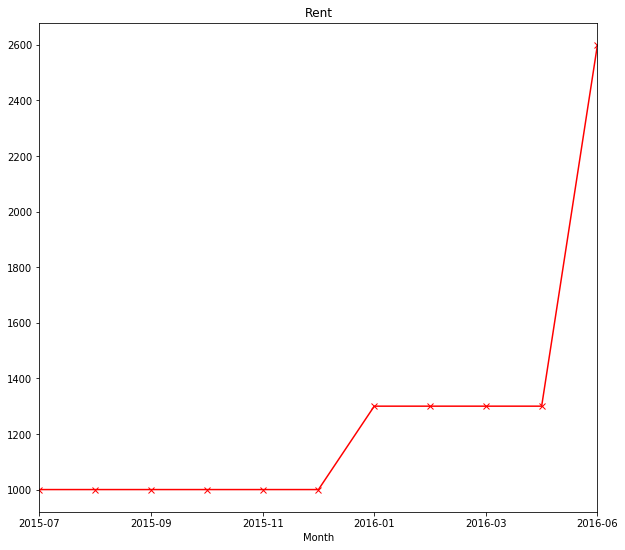

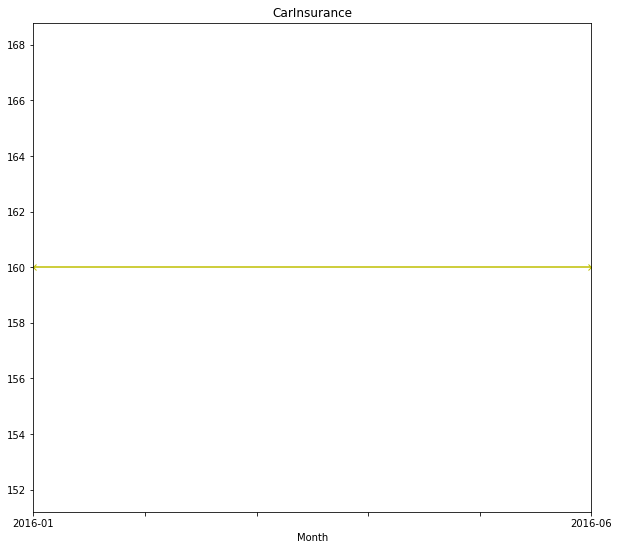

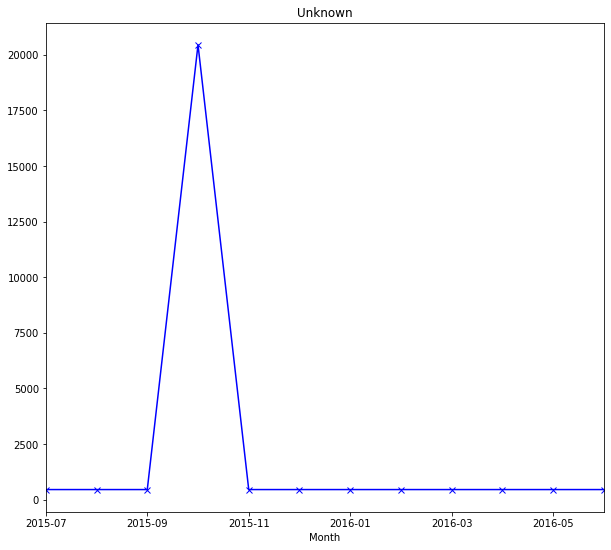

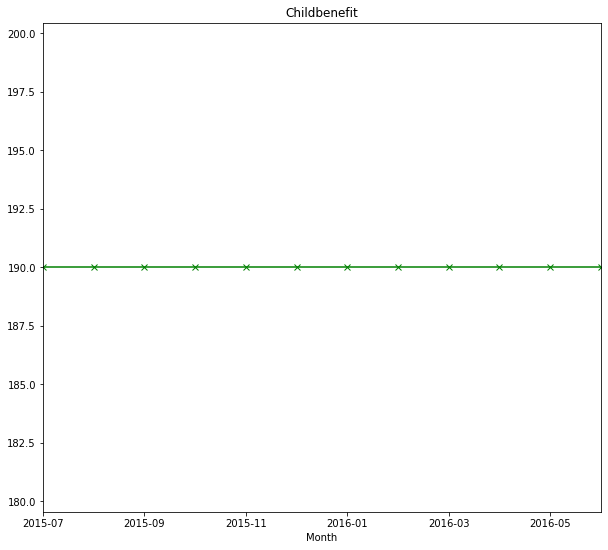

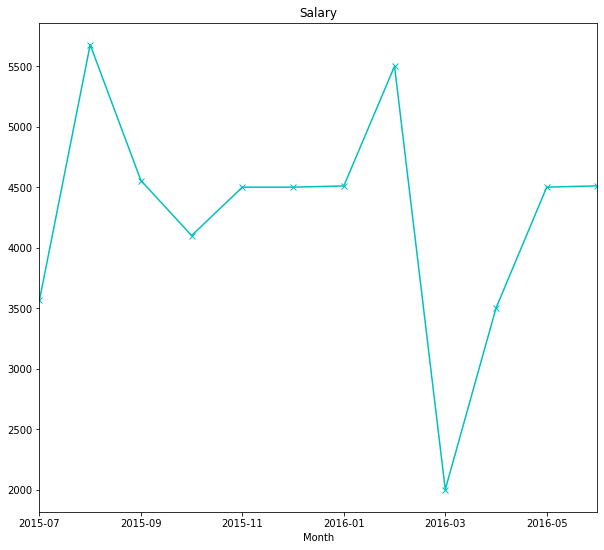

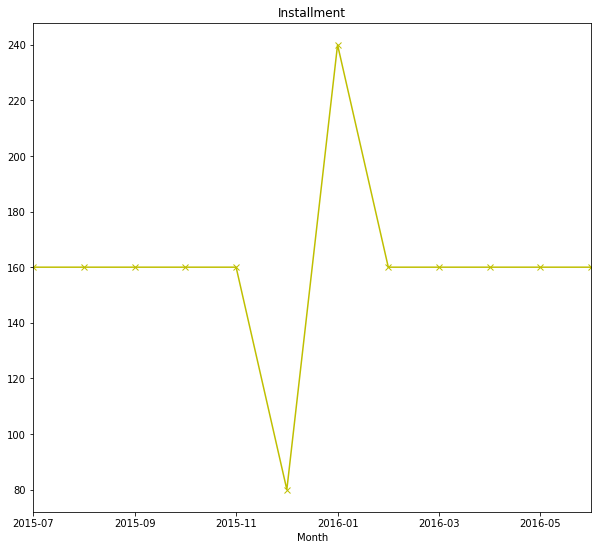

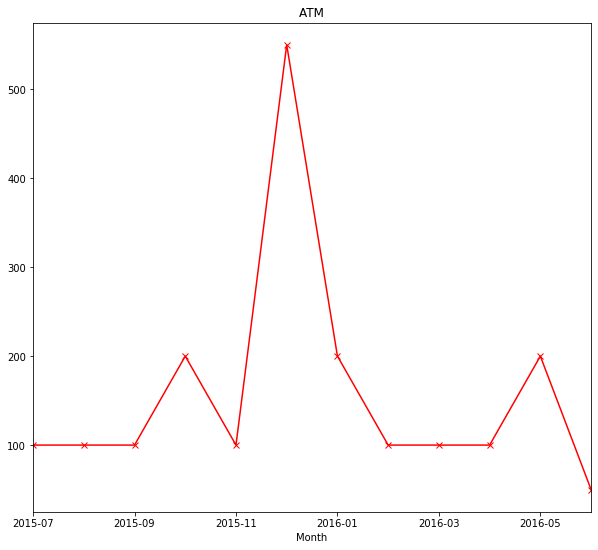

In [534]:
color=['c','r','y','b','g','c','y','r']
for item,color in zip(set(df['bookingType']),color):
    plt.title(item)
#     plt.plot(df[df['bookingType']==item]['amount'])
    abs(df[df['bookingType']==item].groupby('Month').sum()['amount']).plot(color=color,marker='x')
    plt.show()

#Rent has increased 30 % in one year
#travelling increases the most during the December time, may be year around trip for Christmas
#with salary remaining constant during the time, and expense increasing, the installment for December is lowered and increased in the next month to balance
#the expense increase during the December is also evident from the ATM data

<Figure size 1080x720 with 0 Axes>

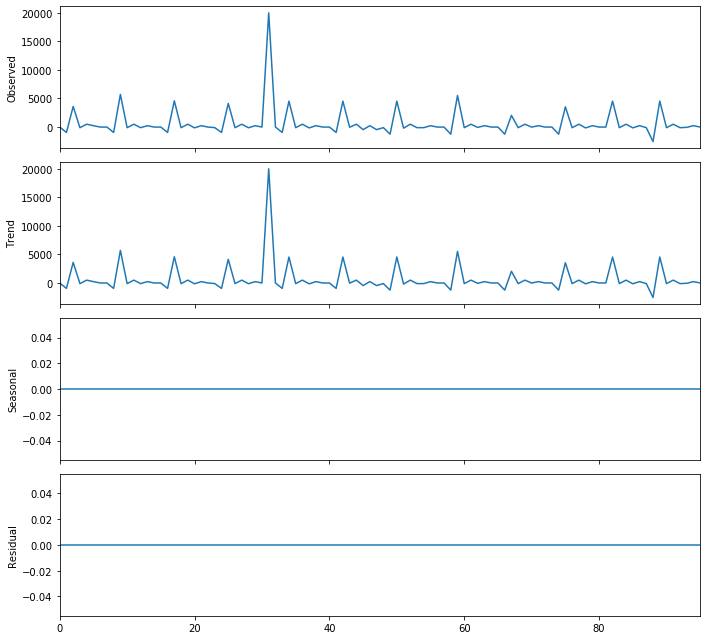

In [315]:
import statsmodels.api as sm
plt.figure(figsize=(15,10))
sm.tsa.seasonal_decompose(df.amount,freq=1).plot()
result = sm.tsa.stattools.adfuller(df.amount)
plt.show()

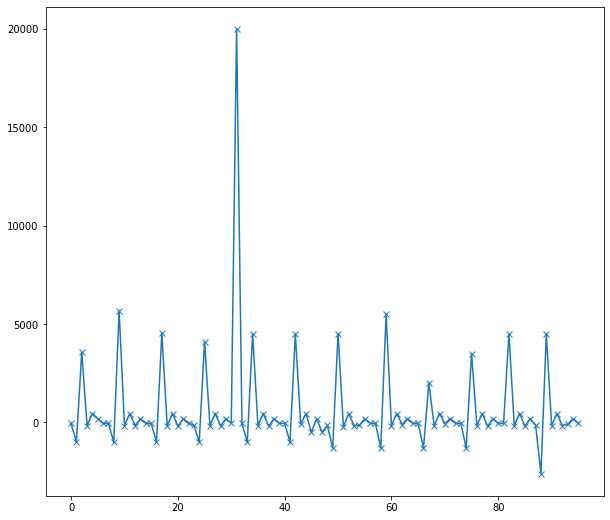

In [313]:
plt.plot(df.amount,marker='x')

In [239]:
df.set_index(['Date'],inplace=True)

In [217]:
df['time']=pd.to_datetime(df.index,format='%Y-%m')

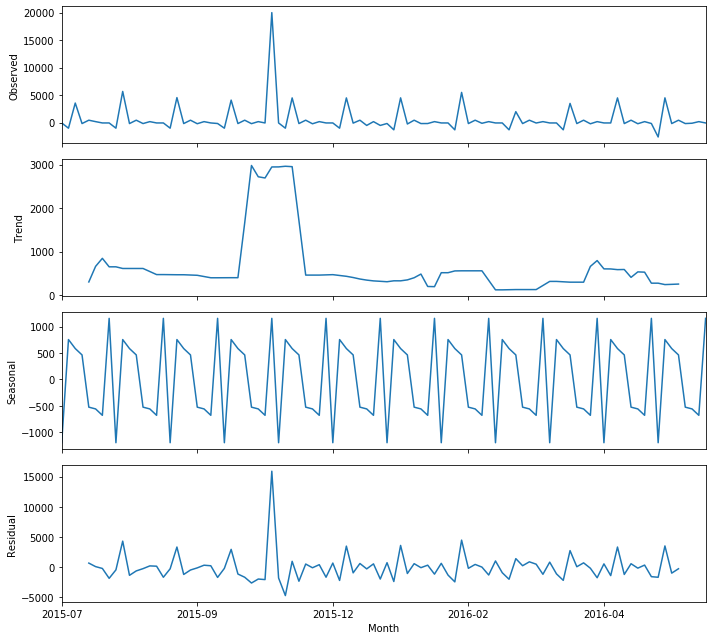

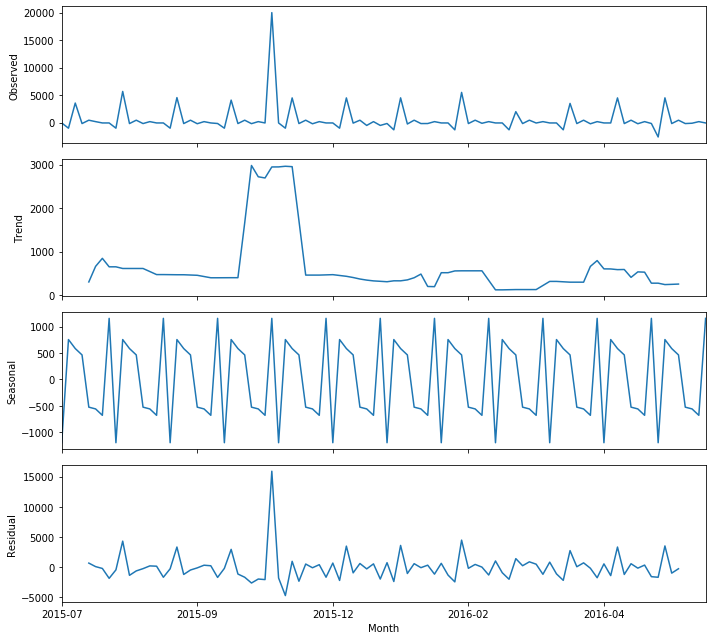

In [528]:
sm.tsa.seasonal_decompose(df_changed_index['amount'],freq=8).plot()

In [343]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [249]:
df_train = df.loc[0:45]
df_test = df.loc[45:]

In [252]:
import numpy as np

In [188]:
pd.DataFrame(df.groupby('Month').amount.rolling(3).mean())

amount
Month                  
2015-07 0           NaN
        1           NaN
        2    838.666667
        3    802.000000
        4   1285.333333
...                 ...
2016-06 91  1600.333333
        92    43.333333
        93    63.333333
        94   -23.333333
        95    13.333333

[95 rows x 1 columns]

In [284]:
df_exp_tot=pd.DataFrame(df_expense.groupby("Month").sum()['amount'])
df_exp_tot_train = df_exp_tot.loc['2015-07':'201-03',:]
df_exp_tot_test = df_exp_tot.loc['2016-03':]

In [548]:
df_train=df_changed_index.loc['2015-08':'2015-12']
df_test = df_changed_index.loc['2016-02':]

In [545]:
df_train=df_train[df_train.amount<10000]

In [546]:
fit1 = ExponentialSmoothing(np.asarray(df_train['amount']) ,seasonal_periods=8,seasonal='add').fit()

Text(0.5, 1.0, 'Time Series for Training Data')

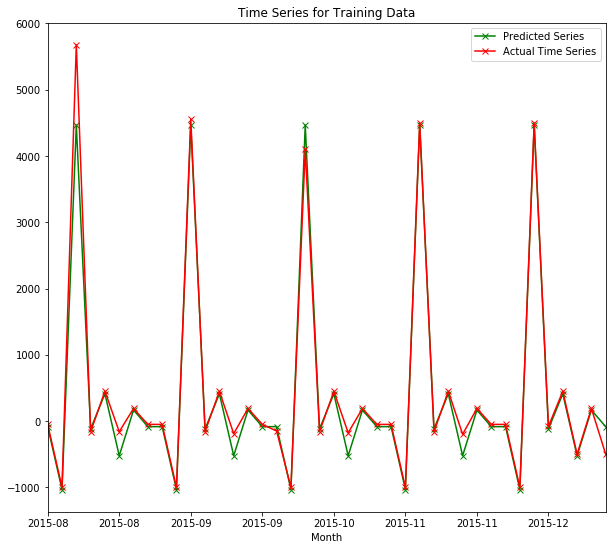

In [547]:
plt.plot(fit1.forecast(len(df_train['amount'])),marker='x',color='g')
# plt.show()
df_train.amount.plot(marker='x',color='r')
# plt.plot(df_train.amount,marker='x',color='r')
plt.legend(['Predicted Series','Actual Time Series'])
plt.title('Time Series for Training Data')

In [555]:
df_test[df_test['bookingType']=='Rent']


,accountNo,user_id,booking_id,amount,bookingDate,partnerAccountIBAN,bookingType,Date
Month,,,,,,,,
2016-02,781,106,59,-1300,2016-02-29 02:00:00,DE511,Rent,2016-02-29 02:00:00
2016-03,781,106,67,-1300,2016-03-29 02:00:00,DE511,Rent,2016-03-29 02:00:00
2016-04,781,106,75,-1300,2016-04-29 02:00:00,DE511,Rent,2016-04-29 02:00:00
2016-06,781,106,89,-2600,2016-06-27 02:00:00,DE511,Rent,2016-06-27 02:00:00


Text(0.5, 1.0, 'Time Series for Test Data')

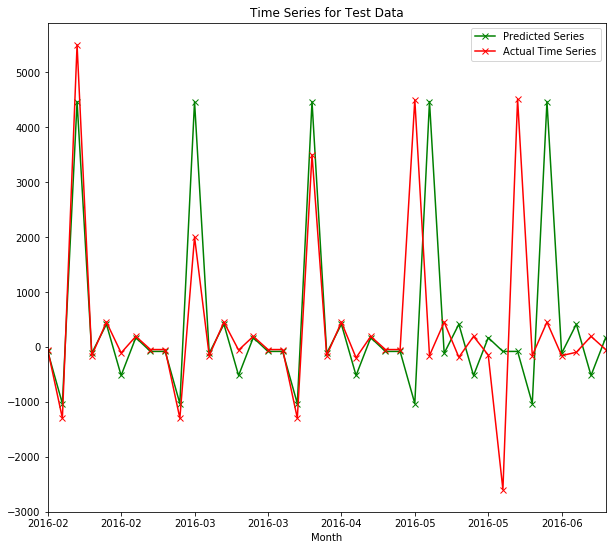

In [549]:
plt.plot(fit1.forecast(len(df_test['amount'])),marker='x',color='g')
# plt.show()
df_test.amount.plot(marker='x',color='r')
# plt.plot(df_test.amount,marker='x',color='r')
plt.legend(['Predicted Series','Actual Time Series'])
plt.title('Time Series for Test Data')